In [1]:
import pymzml
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import eye

# Parameters

In [2]:
%matplotlib inline
# filename = '/Users/simon/Dropbox/MS_Ink_Data/ALphabet/abcdefgh_1.mzML'
filename = '..\\data\\abcdefgh_1.mzML'
mzRangeLower = 374
mzRangeHighest = 376
lines = 8
widthInMM = 62
heightInMM = 10

In [3]:
def imageFromArray(Z):
    max = Z.max()
    Z = Z / max * 255
    Z = Z.astype('uint8')

    img = Image.fromarray(Z)  # monochromatic image
    img.show()
    # img.save('my.png')
    # imrgb = Image.merge('RGB', (img, img, img))  # color image
    # imrgb.show()


# -----------------------------------------------------------------------
# max_mz, max_i = getPeak(spectrum)
def getPeak(spectrum):
    max_mz = spectrum.peaks[0][0]
    max_i = spectrum.peaks[0][1]
    for mz, i in spectrum.peaks:
        if max_i < i:
            max_i = i
            max_mz = mz
            # print(type(mz), type(i))  # float, float
            # print(mz, i)
    return [max_mz, max_i]


# getSum(spectrum)
def getSum(spectrum):
    intensity = 0
    for mz, i in spectrum.peaks:
        intensity = intensity + i
    return intensity


# -----------------------------------------------------------------------

# Read File
run = pymzml.run.Reader(filename, MS1_Precision=5e-6)

# Maximum peaks in 1d array
scansTotal = 0

for spectrum in run:
    if type(spectrum['id']) == int:
        scansTotal = scansTotal + 1
    else:
        print('skip')

scansPerLine = scansTotal / lines  # 6327 , 8
# if not scansPerLine.is_integer():
#    raise Exception('Pixels per line not integer value')
scansPerLine = int(scansPerLine)  # 790 : 6320
remaining = scansTotal - lines * scansPerLine

x = []
t = []

for index in range(1, scansTotal + 1):
    spectrum = run[index]
    spectrum.reduce(mzRange=(mzRangeLower, mzRangeHighest))
    try:
        intensity = getSum(spectrum)
    except:
        intensity = 0
    x.append(0)
    t.append(intensity)

# -----------------------------------------------------------------------

# data[line] = [[[m/z, value],...,[m/z, value]],[[m/z, value],]]
data = []
direction = True  # forward /  backward
index = 0
for line in range(0, lines):
    data.append([])
    if direction:
        for i in range(0, scansPerLine):
            data[line].append([x[index], t[index]])
            index = index + 1
    else:
        for i in reversed(range(0, scansPerLine)):
            data[line].append([x[index + i], t[index + i]])
        index = index + scansPerLine

    direction = not direction
    if remaining >= 0:
        remaining = remaining - 1
        index = index + 1

# -----------------------------------------------------------------------

np_data = np.array(data)
Z = np_data[:, :, 1]
# image(Z)

skip


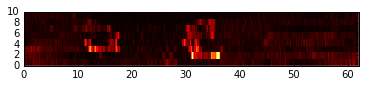

Finished


In [10]:
plt.figure()
plt.imshow(Z, extent=[0,widthInMM,0,heightInMM], interpolation='none', cmap='hot')
# plt.savefig('test.png')
plt.show()

print("Finished")